
# UNEMPLOYMENT ANALYSIS WITH PYTHON

### Problem Statement:
   Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project. 

### Objective: 
   * It is to find the unemployment due to covid-19.
   * To compare the unemployment rate statewise.


**dataset:** https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india

# 1. Importing all the libraries required

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import datetime as dt
import calendar 
import plotly.express as px

# 2. Loading the Data

In [2]:
df=pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv')

# 3. Exploratory Data Analysis

In [3]:
df.shape

(267, 9)

there are 267 rows and 9 columns.

There are 267 rows and 9 columns

In [4]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [7]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [8]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [9]:
df.columns = ['State', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
              'Estimated Employed', 'Estimated Labour Participation Rate (%)',
              'Region', 'longitude', 'latitude']
df.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


There are 9 columns in this dataset.

### Checking for missing value and duplicates

In [10]:
df.isnull().sum()

State                                      0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region                                     0
longitude                                  0
latitude                                   0
dtype: int64

There is no missing values in the database.

In [11]:
df.duplicated().sum()

0

There is no duplicate values in the database.

In [12]:
df.State.value_counts()


State
Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: count, dtype: int64

### Converting date datatype to datetime

In [13]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   State                                    267 non-null    object        
 1   Date                                     267 non-null    datetime64[ns]
 2   Frequency                                267 non-null    object        
 3   Estimated Unemployment Rate (%)          267 non-null    float64       
 4   Estimated Employed                       267 non-null    int64         
 5   Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Region                                   267 non-null    object        
 7   longitude                                267 non-null    float64       
 8   latitude                                 267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), 

In [14]:
df['month_num'] = df['Date'].dt.month
df.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region,longitude,latitude,month_num
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5


In [15]:
df['month'] = df['month_num'].apply(lambda x: calendar.month_abbr[x])
df.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region,longitude,latitude,month_num,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


# 4. Data Visualization

### i) Univariate Analysis

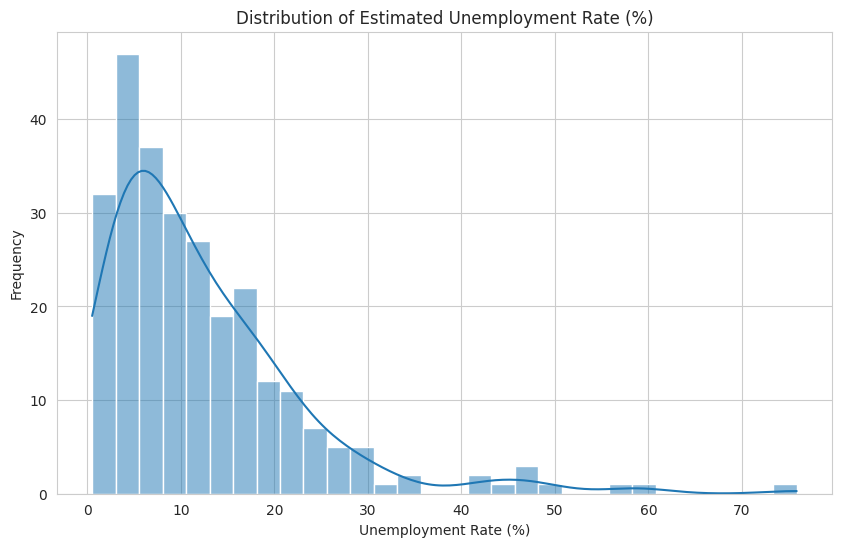

In [16]:
# Plotting the distribution of Estimated Unemployment Rate
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated Unemployment Rate (%)'], bins=30, kde=True)
plt.title('Distribution of Estimated Unemployment Rate (%)')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

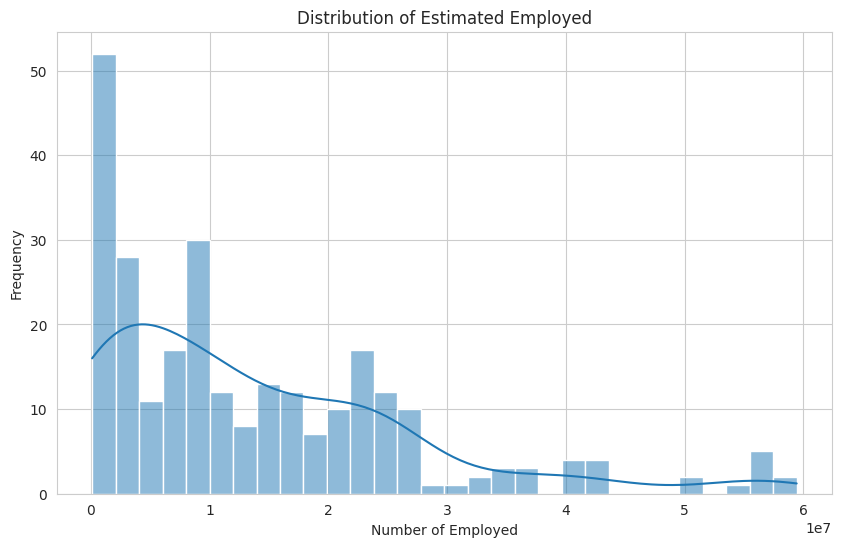

In [17]:
# Plotting the distribution of Estimated Employed
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated Employed'], bins=30, kde=True)
plt.title('Distribution of Estimated Employed')
plt.xlabel('Number of Employed')
plt.ylabel('Frequency')
plt.show()

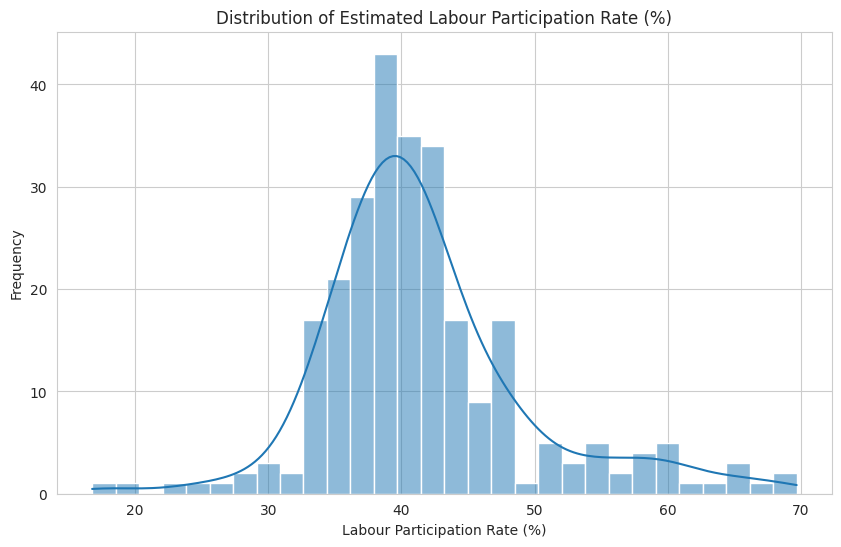

In [18]:
# Plotting the distribution of Estimated Labour Participation Rate
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated Labour Participation Rate (%)'], bins=30, kde=True)
plt.title('Distribution of Estimated Labour Participation Rate (%)')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Statewise unemployment rate for whole year
fig = px.histogram(df, x='State', y='Estimated Unemployment Rate (%)',color='State', animation_frame='month',
                   labels={'Estimated Unemployment Rate (%)': 'Unemployment Rate (%)'},
                   title='Monthly Unemployment Rate Across States')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()


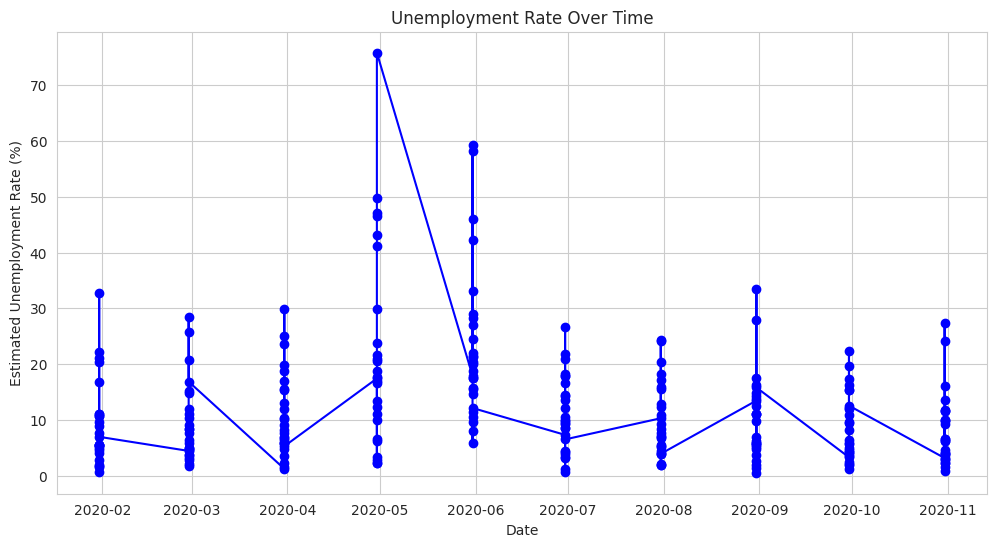

In [20]:
df_sorted = df.sort_values(by='Date')

# Plotting the unemployment rate over time
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['Date'], df_sorted['Estimated Unemployment Rate (%)'], marker='o', linestyle='-', color='b')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.grid(True)
plt.show()


In [21]:
State =  df.groupby(['State'])[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']].mean()
State = pd.DataFrame(State).reset_index()

fig = px.box(data_frame=df,x='State',y='Estimated Unemployment Rate (%)',color='State',title='Unemployment rate')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

### ii) Bivariate Analysis

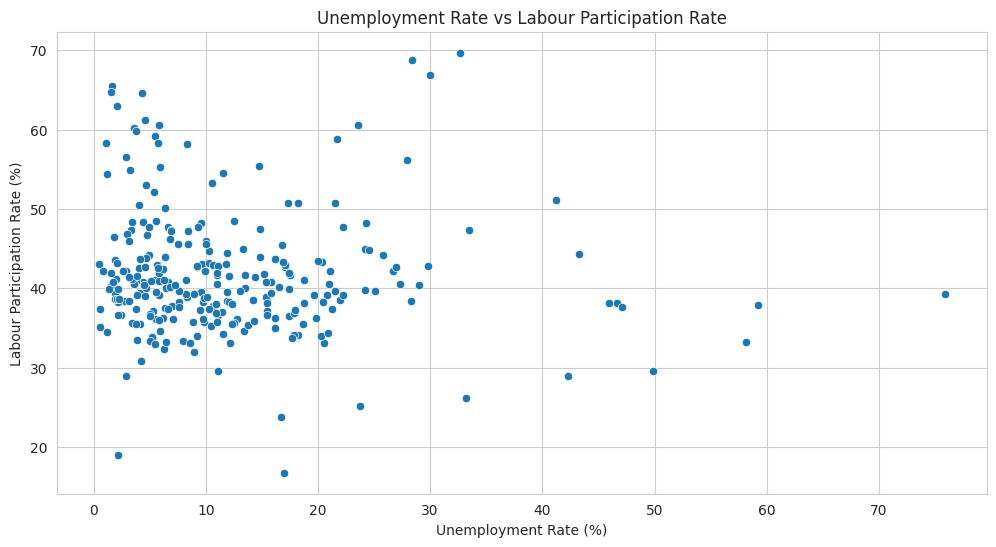

In [22]:
# Exploring the relationship between Unemployment Rate and Labour Participation Rate
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Estimated Unemployment Rate (%)', y='Estimated Labour Participation Rate (%)')
plt.title('Unemployment Rate vs Labour Participation Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Labour Participation Rate (%)')
plt.show()


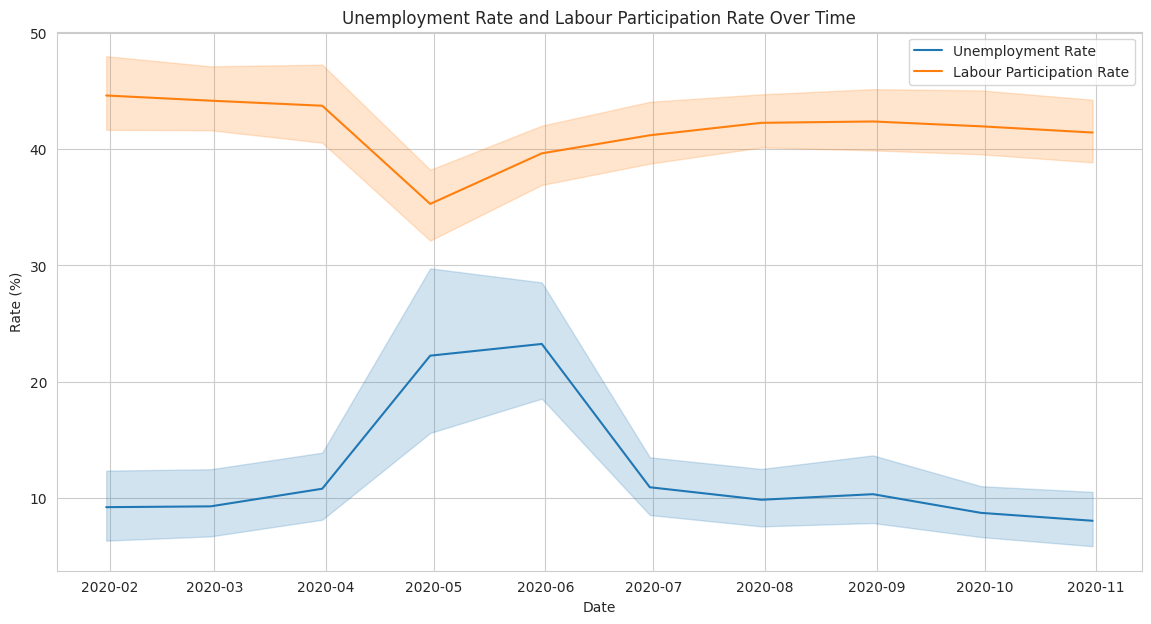

In [23]:
# Exploring the relationship between Unemployment Rate and Employed count over time
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', label='Unemployment Rate')
sns.lineplot(data=df, x='Date', y='Estimated Labour Participation Rate (%)', label='Labour Participation Rate')
plt.title('Unemployment Rate and Labour Participation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.show()

### iii) Multivariate Analysis


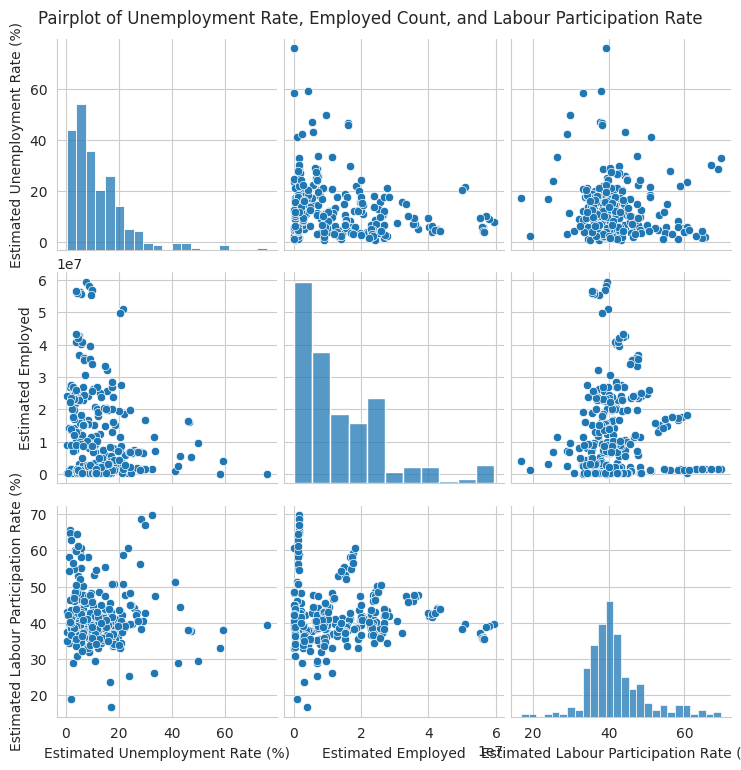

In [24]:
# Pairplot to visualize the relationships between Unemployment Rate, Employed count, and Labour Participation Rate
sns.pairplot(df, vars=['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)'])
plt.suptitle('Pairplot of Unemployment Rate, Employed Count, and Labour Participation Rate', y=1.02)
plt.show()


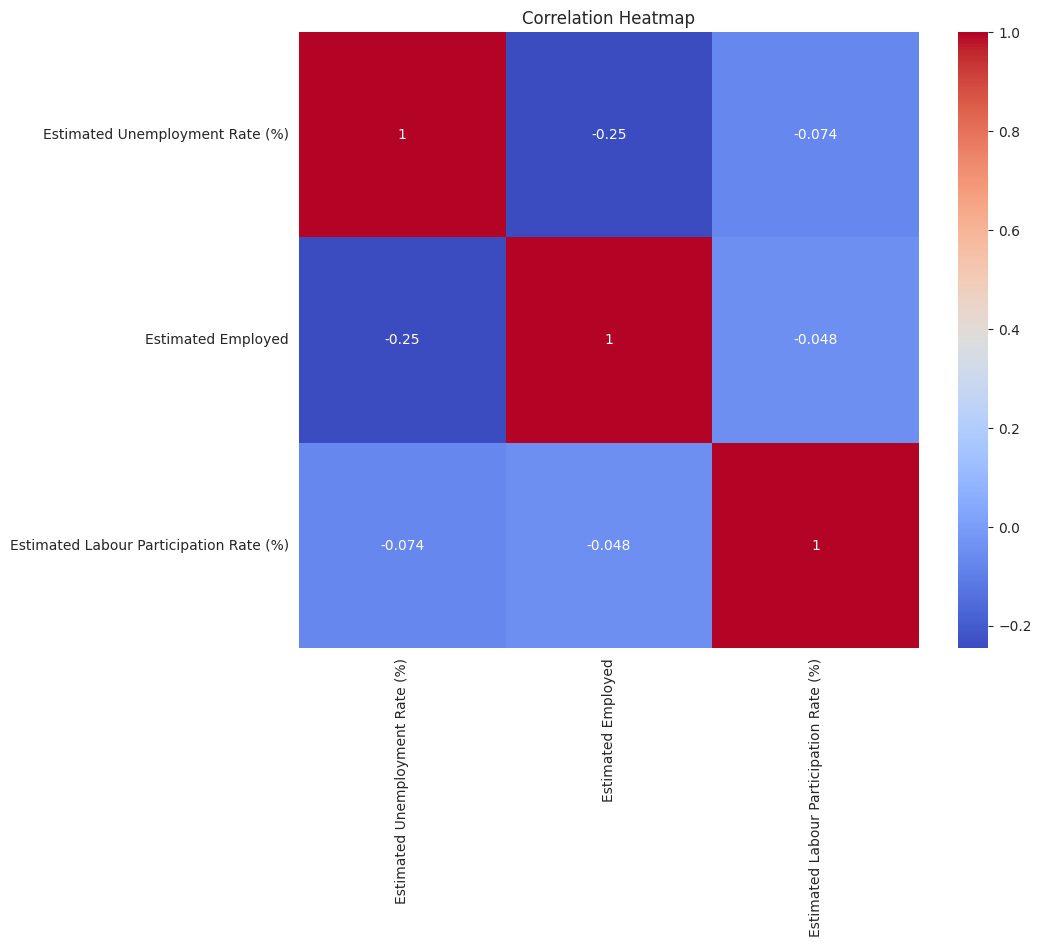

In [25]:
# Heatmap to visualize the correlation between the numerical variables
plt.figure(figsize=(10, 8))
corr = df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
unemployment =df.groupby(['Region','State'])['Estimated Unemployment Rate (%)'].mean().reset_index()
unemployment.head()
fig = px.sunburst(unemployment,path=['Region','State'],values='Estimated Unemployment Rate (%)',
                 title ='Unemployment rate in state and region',height=600)
fig.show()